# MNIST Neural Network from scratch

Here I've Implemented a two-layer neural network which is simple and trained it on the MNIST digit recognizer dataset. After learning CNN and got impressed by the CN networks I have tried to implement it from scratch no Tensor Flow or Keras. As an instutional example it is very much interesting to learn NN and Implment them from scratch and The math can be find in the below explanation.


> ***Import Libraries***

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

> ***Digit Recognizer dataset***

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

> ***shuffle before splitting into dev and training sets***

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
Y_train

array([0, 5, 5, ..., 9, 8, 9])

> # ***The Math***

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

> ***Define Functions***

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

> ***Gradient Descent***

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

> ***Implement GD***

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 9 ... 6 9 9] [0 5 5 ... 9 8 9]
0.11429268292682927
Iteration:  10
[2 5 5 ... 6 6 2] [0 5 5 ... 9 8 9]
0.1618780487804878
Iteration:  20
[2 5 4 ... 6 6 7] [0 5 5 ... 9 8 9]
0.2233658536585366
Iteration:  30
[0 5 4 ... 6 6 7] [0 5 5 ... 9 8 9]
0.2796585365853659
Iteration:  40
[0 5 4 ... 4 6 7] [0 5 5 ... 9 8 9]
0.32709756097560977
Iteration:  50
[0 5 4 ... 4 6 7] [0 5 5 ... 9 8 9]
0.3770487804878049
Iteration:  60
[0 3 4 ... 4 6 7] [0 5 5 ... 9 8 9]
0.43373170731707317
Iteration:  70
[0 3 4 ... 4 6 7] [0 5 5 ... 9 8 9]
0.4848780487804878
Iteration:  80
[0 5 4 ... 4 6 7] [0 5 5 ... 9 8 9]
0.5260487804878049
Iteration:  90
[0 5 4 ... 4 6 7] [0 5 5 ... 9 8 9]
0.5583658536585366
Iteration:  100
[0 5 4 ... 4 8 7] [0 5 5 ... 9 8 9]
0.586170731707317
Iteration:  110
[0 5 4 ... 4 8 7] [0 5 5 ... 9 8 9]
0.6099756097560975
Iteration:  120
[0 5 4 ... 4 8 7] [0 5 5 ... 9 8 9]
0.6293658536585366
Iteration:  130
[0 5 4 ... 9 8 7] [0 5 5 ... 9 8 9]
0.6481219512195122
Iteration:  140

> *~85% accuracy on training set.*

> ***Testing Predictions***

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

> *Let's look at a some of examples:*

Prediction:  [0]
Label:  0


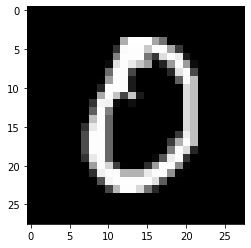

Prediction:  [5]
Label:  5


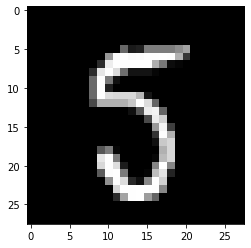

Prediction:  [5]
Label:  5


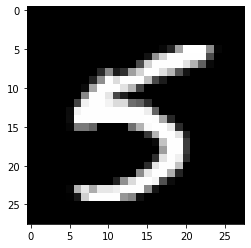

Prediction:  [0]
Label:  0


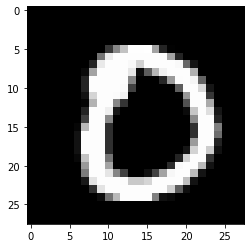

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

> *Finally, let's find the accuracy :*

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 9 1 2 4 8 8 8 7 2 5 4 0 6 5 8 0 0 3 4 9 3 8 9 4 6 5 5 4 3 0 4 9 7 4 3 5
 3 0 3 1 1 4 4 9 3 8 4 0 0 5 6 7 7 9 6 0 2 4 6 2 2 9 0 6 9 6 8 4 5 7 8 4 4
 5 7 3 8 8 8 1 8 6 1 8 4 8 5 9 2 4 8 9 1 8 2 1 7 1 3 2 7 0 4 1 2 9 2 5 5 6
 6 7 1 5 8 4 0 0 9 0 7 5 9 5 2 9 9 3 1 3 4 9 5 4 6 3 5 5 6 3 1 0 4 3 2 7 0
 1 0 6 0 5 9 5 0 5 4 9 6 0 2 9 5 8 3 2 6 4 5 1 2 1 1 6 4 0 7 3 1 3 2 7 7 6
 8 1 6 2 9 2 8 7 4 2 4 7 2 0 3 3 3 6 4 5 7 0 0 6 0 3 4 3 1 5 5 5 2 3 8 3 8
 3 3 7 9 6 7 1 6 3 2 8 2 7 2 0 2 0 9 1 5 6 5 8 2 3 2 6 3 7 2 0 6 1 1 3 3 0
 2 2 5 1 8 1 3 4 1 0 0 0 3 6 0 5 1 6 8 7 5 4 5 8 0 3 7 6 1 1 5 0 2 1 9 8 0
 8 2 6 2 8 5 1 9 9 0 9 1 3 3 6 1 7 5 4 6 4 2 4 6 8 9 3 1 7 8 1 0 3 6 1 2 3
 0 7 9 8 8 6 4 0 2 9 3 9 6 2 0 7 6 1 0 6 6 6 6 5 5 9 4 0 1 8 1 1 9 8 9 3 4
 9 2 6 9 0 7 8 7 9 9 3 3 8 7 1 6 1 3 3 2 4 0 0 7 5 1 6 5 8 8 7 9 2 6 7 0 7
 5 1 6 1 4 1 0 4 9 4 9 2 5 8 7 4 8 0 1 7 0 7 5 1 9 2 0 3 1 4 5 0 1 8 2 2 1
 4 7 0 1 0 8 1 9 7 8 1 4 6 6 8 2 8 4 8 9 5 2 0 9 5 5 2 0 7 0 3 0 4 9 4 3 3
 0 1 0 2 1 0 8 1 3 9 0 4 

0.848

> *Still 84% accuracy, so our model generalized from the training data pretty well.*